In [29]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v0")

In [39]:
RUNS = 1000
wins = 0
wins_perc = []
for episode in range(RUNS):
    done = False
    env.reset()
    count = 0
    while not done and count < 20:
        count += 1
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        if done:
            wins_perc.append(reward)
        if reward == 1:
            wins += 1
            break

In [40]:
wins

14

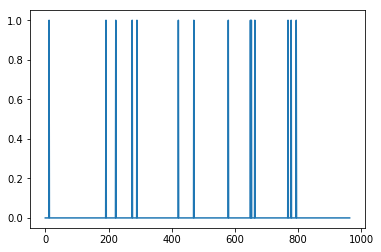

In [41]:
%matplotlib inline
plt.plot(wins_perc)

## Deterministic Policy:

In [45]:
RUNS = 1000
wins = 0
wins_perc = []
policy = [2,2,1,1,1,2]
for episode in range(RUNS):
    done = False
    env.reset()
    count = 0
    while not done and count < 20:
        if count < len(policy):
            action = policy[count]
        else:
            action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        count += 1
        if done:
            wins_perc.append(reward)
        if reward == 1:
            wins += 1
            break

In [46]:
wins

25

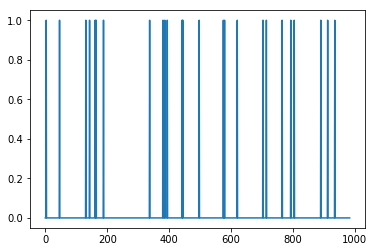

In [47]:
%matplotlib inline
plt.plot(wins_perc)

# The Heroic Moment of Q-Learning

In [66]:
import numpy as np
class Agent:
    def __init__(self, state_size, action_size, initial_Q = 5, gamma = 0.9, alpha = 0.001, epsilon_max = 1.0, epsilon_min = 0.01):
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon_max = epsilon_max
        self.epsilon_min = epsilon_min
        self.epsilon_current = epsilon_max
        self.Q = np.ones((state_size, action_size)) * initial_Q
    def act(self, state, env):
        if np.random.uniform() < self.epsilon_current:
#             print("Passed here bf")
            action = env.action_space.sample()
#             print(action)
#             print("Passed here af")
        else:
            action = np.argmax(self.Q[state,:])
        return action
    def update(self, state, action, reward , new_state):
        self.Q[state, action] = self.Q[state, action] + self.alpha * (reward + self.gamma * self.Q[new_state, np.argmax(self.Q[new_state, :])]) - self.Q[state, action])
    
    def update_epsilon(self):
        if self.epsilon_current > self.epsilon_min:
            self.epsilon_current *= 0.99
            return True
        else:
            return False


import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v0")

RUNS = 1000
wins = 0
wins_perc = []
agent = Agent(state_size=env.observation_space.n, action_size=env.action_space.n)
for episode in range(RUNS):
    done = False
    state = env.reset()
    count = 0
#     print("Episode {} started".format(episode))
    while not done and count < 50:
        action = agent.act(state, env)
        state, reward, done, info = env.step(action)
        count += 1
        if done:
            wins_perc.append(reward)
        if reward == 1:
            wins += 1
#             print("WINS:", wins)
            break
    agent.update_epsilon()
%matplotlib inline
plt.plot(wins_perc)

SyntaxError: invalid syntax (<ipython-input-66-54a3bc84611e>, line 20)